In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 50
df_load = pd.read_csv('dqlab_telco.csv')
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_load.shape

(7113, 22)

In [4]:
df_load.customerID.nunique()

7017

In [5]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [6]:
# Memfilter ID Pelanggan dengan Format tertentu
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN,True
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN,True
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN,True
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN,True


In [7]:
df_load_nonvalid = (df_load[df_load['valid_id'] == False])
df_load_nonvalid

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
15,202006,4.54E+11,Female,0,Yes,Yes,69.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,False
27,202006,4.59E+11,Male,0,Yes,Yes,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,False
151,202006,4.54E+11,Male,0,No,No,7.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.00,655.50,Yes,False
315,202006,4.55E+11,Male,0,Yes,Yes,51.0,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40,No,False
319,202006,4.57E+11,Male,0,Yes,No,35.0,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),91.50,3236.35,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,202006,450644FG341,Male,1,No,No,4.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.65,293.85,No,False
7066,202006,454077HI533,Female,0,Yes,Yes,31.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,3243.45,Yes,False
7067,202006,4531JK36957,Male,0,Yes,Yes,47.0,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.20,No,False
7068,202006,45LM6835177,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,79.25,Yes,False


In [8]:
df_load = (df_load[df_load['valid_id'] == True])
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN,True
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN,True
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN,True
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN,True


In [9]:
df_load = df_load.drop('valid_id', axis = 1)
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [10]:
# Memfilter Duplikasi ID Number Pelanggan Secara keseluruhan
duplicateRowDF = df_load[df_load.duplicated(keep=False)]
duplicateRowDF

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6578,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
6579,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
6580,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No
6581,202006,45245391649,Female,1,No,No,54.0,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,No,Mailed check,72.10,3886.05,No
6582,202006,45955898553,Female,0,No,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.75,7283.25,No
6583,202006,45961764656,Female,0,No,No,22.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,No
6584,202006,45634041360,Female,0,Yes,Yes,50.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1070.25,No
7050,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
7051,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
7052,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No


In [11]:
duplicateRowDF.count()

UpdatedAt           14
customerID          14
gender              14
SeniorCitizen       14
Partner             14
Dependents          14
tenure              14
PhoneService        14
MultipleLines       14
InternetService     14
OnlineSecurity      14
OnlineBackup        14
DeviceProtection    14
TechSupport         14
StreamingTV         14
StreamingMovies     14
Contract            14
PaperlessBilling    14
PaymentMethod       14
MonthlyCharges      14
TotalCharges        14
Churn               14
dtype: int64

In [12]:
df_load.drop_duplicates(inplace=True)
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [13]:
# Duplikasi karena beda Update Data
duplicateRowID = df_load[df_load.customerID.duplicated(keep = False)]
duplicateRowID

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
16,202006,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
17,202006,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
18,202006,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
19,202006,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,No
20,202006,45877978431,Male,1,No,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
21,202006,45168014322,Male,0,Yes,No,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
7044,202005,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,Yes
7045,202005,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7702.25,No
7046,202005,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),60.20,528.35,Yes
7047,202005,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,180.05,1862.90,No


In [14]:
duplicateRowID.count()

UpdatedAt           12
customerID          12
gender              12
SeniorCitizen       12
Partner             12
Dependents          12
tenure              12
PhoneService        12
MultipleLines       12
InternetService     12
OnlineSecurity      12
OnlineBackup        12
DeviceProtection    12
TechSupport         12
StreamingTV         12
StreamingMovies     12
Contract            12
PaperlessBilling    12
PaymentMethod       12
MonthlyCharges      12
TotalCharges        12
Churn               12
dtype: int64

In [15]:
df_load.sort_values('UpdatedAt', ascending = False)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,202005,45418334682,Female,0,No,No,21.0,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,180.05,1862.90,No
7046,202005,45419036262,Female,0,Yes,Yes,10.0,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),60.20,528.35,Yes
7045,202005,45995925610,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7702.25,No
7044,202005,45819132957,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,Yes


In [16]:
df_load = df_load.drop_duplicates(['customerID'])
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [20]:
# Mengatasi Missing Value Dengan Penghapusan Rows
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

In [25]:
df_load0 = df_load[df_load['Churn'].isna()]
df_load0.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7070,202006,45956412955,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,51.25,51.25,NaN
7071,202006,45193592789,Male,0,Yes,No,56.0,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.70,4952.95,NaN
7072,202006,45253562040,Female,0,Yes,No,70.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.55,4504.90,NaN
7073,202006,45208235287,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.60,45.60,NaN
7074,202006,45147069010,Male,0,Yes,Yes,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Electronic check,93.65,4520.15,NaN


In [26]:
df_load.dropna(subset = ['Churn'], inplace = True)
df_load

<ipython-input-26-c978af2587d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load.dropna(subset = ['Churn'], inplace = True)


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,202006,45684085912,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,202006,45223431468,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,202006,45480105152,Female,0,Yes,Yes,NaN,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,202006,45836120314,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [29]:
df_load.isnull().sum().sort_values(ascending = False)

tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

In [30]:
# Mengisi Missing Value dengan Pengisian Nilai Tertentu

In [31]:
# Tenure diisi sesuai dengan permintaan user
df_load['tenure'].fillna(11, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
df_load.isnull().sum().sort_values(ascending = False)

MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
customerID           0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

In [35]:
# MonthlyCharges diisi sesuai dengan Median
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace = True)

In [36]:
df_load.isnull().sum().sort_values(ascending = False)

UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64

In [37]:
# Mendeteksi adanya Outlier

In [40]:
# Persebaran data sebelum ditangani Outlier
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


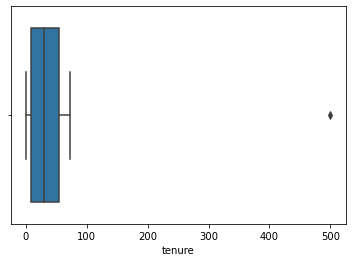

In [41]:
# cek Bloxpot Kolom tenure
plt.figure()
sns.boxplot(x = df_load['tenure'])
plt.show()

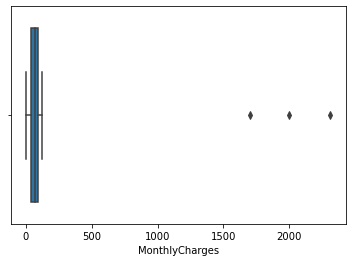

In [42]:
# cek Bloxpot Kolom MonthlyCharges
plt.figure()
sns.boxplot(x = df_load['MonthlyCharges'])
plt.show()

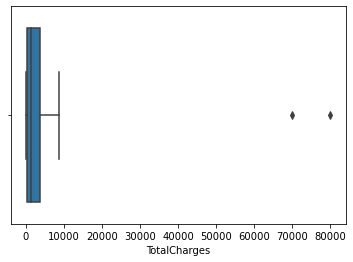

In [43]:
# cek Bloxpot Kolom TotalCharges
plt.figure()
sns.boxplot(x = df_load['TotalCharges'])
plt.show()

In [44]:
# Mengatasi Outlier

In [45]:
Q1 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

In [46]:
Q1

tenure              9.0000
MonthlyCharges     36.4625
TotalCharges      406.9750
Name: 0.25, dtype: float64

In [48]:
Q3

tenure              55.0000
MonthlyCharges      89.8500
TotalCharges      3799.8375
Name: 0.75, dtype: float64

In [49]:
IQR

tenure              46.0000
MonthlyCharges      53.3875
TotalCharges      3392.8625
dtype: float64

In [51]:
maximum = Q3 + (1.5 * IQR)
maximum

tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

In [52]:
minimum = Q1 - (1.5 * IQR)
minimum

tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

In [55]:
more_than = (df_load > maximum)
more_than

<ipython-input-55-6daf2ec99d10>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)


,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,UpdatedAt,customerID,gender,tenure
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
lower_than

,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,UpdatedAt,customerID,gender,tenure
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df_load = df_load.mask(more_than, maximum, axis = 1)
df_load = df_load.mask(lower_than, minimum, axis = 1)

In [58]:
# Persebaran data setelah ditangani Outlier
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


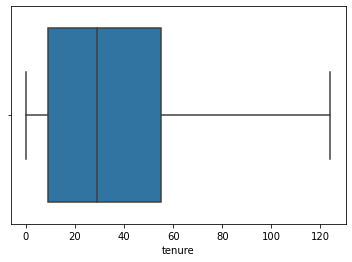

In [59]:
# cek Bloxpot Kolom tenure
plt.figure()
sns.boxplot(x = df_load['tenure'])
plt.show()

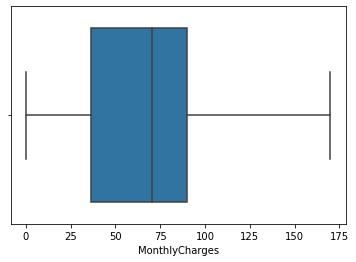

In [60]:
# cek Bloxpot Kolom MonthlyCharges
plt.figure()
sns.boxplot(x = df_load['MonthlyCharges'])
plt.show()

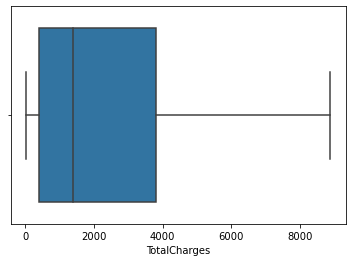

In [61]:
# cek Bloxpot Kolom TotalCharges
plt.figure()
sns.boxplot(x = df_load['TotalCharges'])
plt.show()

In [64]:
# Mendeteksi Nilai yang Tidak Standar
for col_name in (['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn',]):
    print(df_load[col_name].value_counts())

Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
No     3591
Yes    3359
Name: Partner, dtype: int64
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64
1.0      602
72.0     359
2.0      231
3.0      197
4.0      175
        ... 
39.0      54
44.0      51
36.0      48
0.0       11
124.0      1
Name: tenure, Length: 74, dtype: int64
Yes    6281
No      669
Name: PhoneService, dtype: int64
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64
No                     3454
Yes                    1991
No internet service    1505
Name: OnlineSecurity, dtype: int64
No                     3045
Yes                    2400
No internet service    1505
Name: OnlineBackup, dtype: int64
No                     3054
Yes                 

In [65]:
# Menstandarisasi Variabel Kategorik
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

In [66]:
# Mendeteksi Nilai yang Sudah diStandarkan
for col_name in (['gender','Dependents','Churn',]):
    print(df_load[col_name].value_counts())

Male      3505
Female    3445
Name: gender, dtype: int64
No     4870
Yes    2080
Name: Dependents, dtype: int64
No     5114
Yes    1836
Name: Churn, dtype: int64
